<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/sir_seir_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint

%config InlineBackend.figure_format = 'retina'

In [ ]:
#SIR Model
#Differential equations
def deriv(y, t, N, beta, gamma):
  S, I, R = y
  dSdt = (-beta * S * I) / N
  dIdt = ((beta * S * I) / N) - gamma * I
  dRdt = gamma * I
  return dSdt, dIdt, dRdt

#Number of population
N = 1000

#Time period (100 days)
t = np.arange(0, 100, 1)

#Initial number of infected and recovered
I0 = 1
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - I0 - R0

#Set Beta and Gamma
beta = 2
gamma = 28

#Constant rate beta and gamma rates
b = 1 / beta
g = 1 / gamma

#Integration SIR model
simulationResult = odeint(deriv, (S0, I0, R0), t, args = (N, b, g))

#Summary
simulationResult = pd.DataFrame(simulationResult, columns = ['Susceptible', 'Infectious', 'Recovery'])
simulationResult = simulationResult.astype(np.int32)

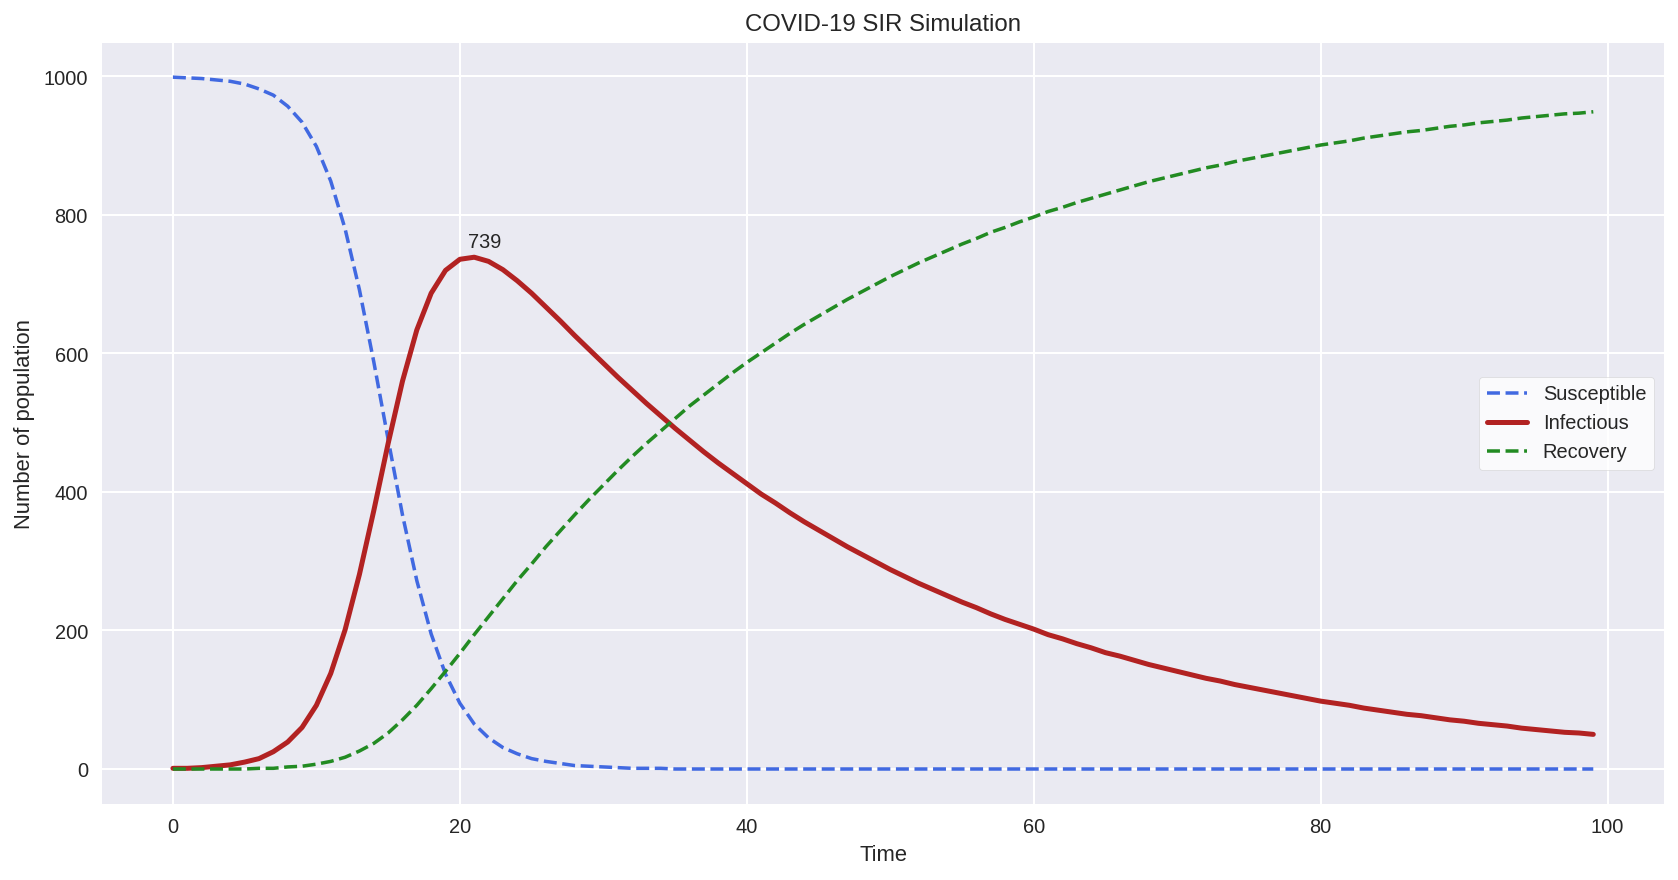

In [ ]:
#Plot the simulation
plt.figure(figsize = (14, 7))
with plt.style.context('seaborn'):
  plt.title('COVID-19 SIR Simulation')
  plt.xlabel('Time')
  plt.ylabel('Number of population')
  plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--', label = 'Susceptible') #S
  plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5, label = 'Infectious') #I
  plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--', label = 'Recovery') #R
  plt.annotate(simulationResult['Infectious'].max(), 
               (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()), 
               textcoords = 'offset points', xytext = (5, 5), ha = 'center')
  plt.legend(frameon = True, facecolor = 'white')
  plt.show()

In [ ]:
#SEIR Mdodel
#Differential equations
def deriv(y, t, N, beta, gamma, sigma):
  S, E, I, R = y
  dSdt = -beta * S * I / N
  dEdt = beta * S * I / N - sigma * E
  dIdt = sigma * E - gamma * I
  dRdt = gamma * I
  return dSdt, dEdt, dIdt, dRdt

#Contact rate beta, gamma and delta rates
b = 1 / 2
g = 1 / 28
s = 1 / 14

#Initial number of exposed, infected and recovered
E0 = 1
I0 = 0
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - E0 - I0 - R0

#Integration SEIR model
simulationResult = odeint(deriv, (S0, E0, I0, R0), t, args = (N, b, g, s))

#Summary
simulationResult = pd.DataFrame(simulationResult, columns = ['Susceptible', 'Exposed', 'Infectious', 'Recovery'])
simulationResult = simulationResult.astype(np.int32)

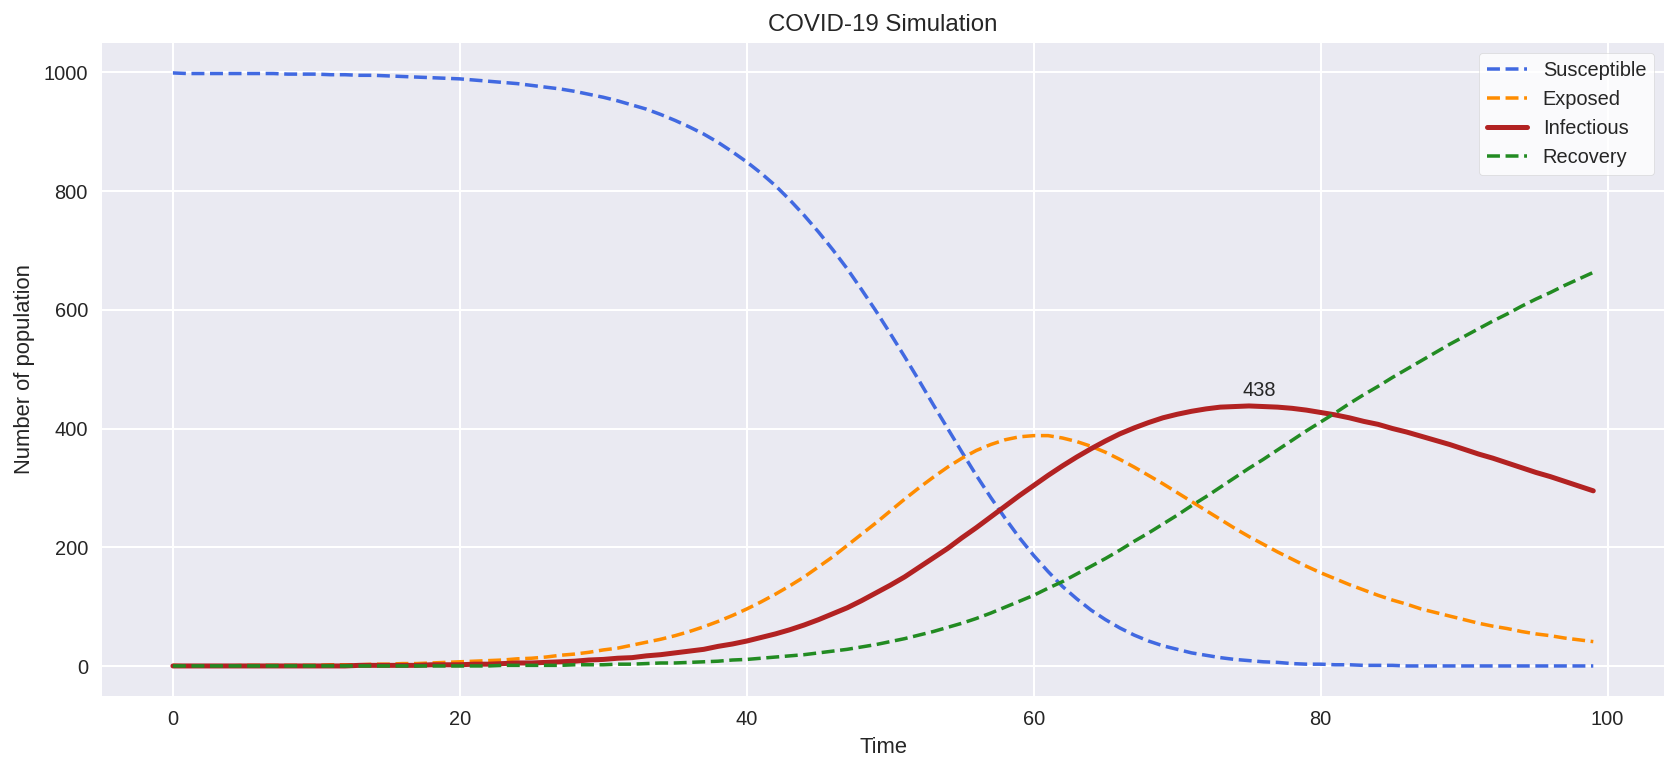

In [ ]:
#Plotting the simulation
plt.figure(figsize = (14, 7))
with plt.style.context('seaborn'):
  plt.title('COVID-19 SEIR Simulation')
  plt.xlabel('Time')
  plt.ylabel('Number of population')
  plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--', label = 'Susceptible') #S
  plt.plot(simulationResult['Exposed'], c = 'darkorange', linestyle = '--', label = 'Exposed') #E
  plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5, label = 'Infectious') #I
  plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--', label = 'Recovery') #R
  plt.annotate(simulationResult['Infectious'].max(), 
               (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()), 
               textcoords = 'offset points', xytext = (5, 5), ha = 'center')
  plt.legend(frameon = True, facecolor = 'white')
  plt.show()